# (Ford GoBike System Data)
## by (Ghadi Alowaimer)

## Investigation Overview

> My goal in this project is to investigate the interest of the main features  

## Dataset Overview

> The dataset includes 1863721 trips with 15 features ( trip duration, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, bike share for all trip, month ). Most variables are numeric in nature, but the variables start time, end time, start station name, end station name, user type, bike share for all trip and month are string object

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_jan_month = pd.read_csv('201801-fordgobike-tripdata.csv')
df_feb_month = pd.read_csv('201802-fordgobike-tripdata.csv')
df_mar_month = pd.read_csv('201803-fordgobike-tripdata.csv')
df_apr_month = pd.read_csv('201804-fordgobike-tripdata.csv')
df_may_month = pd.read_csv('201805-fordgobike-tripdata.csv')
df_june_month = pd.read_csv('201806-fordgobike-tripdata.csv')
df_july_month = pd.read_csv('201807-fordgobike-tripdata.csv')
df_aug_month = pd.read_csv('201808-fordgobike-tripdata.csv')
df_sept_month = pd.read_csv('201809-fordgobike-tripdata.csv')
df_oct_month = pd.read_csv('201810-fordgobike-tripdata.csv')
df_nov_month = pd.read_csv('201811-fordgobike-tripdata.csv')
df_dec_month = pd.read_csv('201812-fordgobike-tripdata.csv')

# add month column for each dataset
df_jan_month = df_jan_month.assign(month='Jan')
df_feb_month = df_feb_month.assign(month='Feb')
df_mar_month = df_mar_month.assign(month='Mar')
df_apr_month = df_apr_month.assign(month='Apr')
df_may_month = df_may_month.assign(month='May')
df_june_month = df_june_month.assign(month='June')
df_july_month = df_july_month.assign(month='July')
df_aug_month = df_aug_month.assign(month='Aug')
df_sept_month = df_sept_month.assign(month='Sept')
df_oct_month = df_oct_month.assign(month='Oct')
df_nov_month = df_nov_month.assign(month='Nov')
df_dec_month = df_dec_month.assign(month='Dec')

# Joining all the datasets together
df = pd.concat([df_jan_month, df_feb_month, df_mar_month, df_apr_month, df_may_month, df_june_month, df_july_month, df_aug_month, df_sept_month, df_oct_month, df_nov_month, df_dec_month])

## (Visualization 1)

> The average duration of the trips looks more normally distributed when I used log transformation. The majority of the trips are almost taken 600 hundred seconds which we can consider it short time

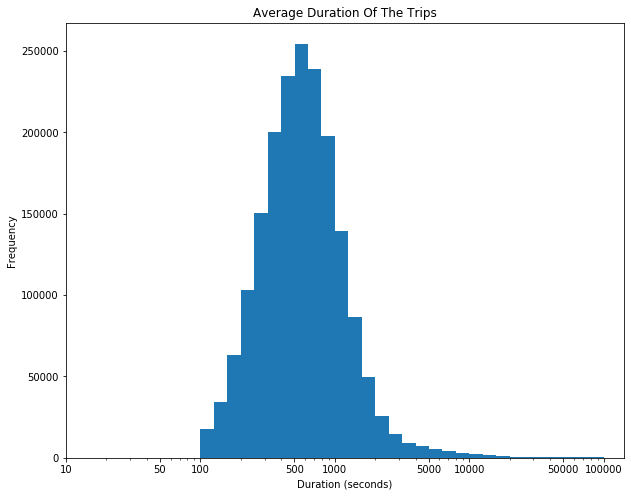

In [3]:
bin_edges = 10**np.arange( 2 , 5+0.1 , 0.1)
plt.figure(figsize = [10, 8])
tick_locs =  [ 10 , 50, 100, 500, 1000, 5000, 10000,50000,100000]
labels = ['{}'.format(v) for v in tick_locs]
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges);

plt.xscale('log');
plt.xticks(tick_locs,labels);
plt.title("Average Duration Of The Trips")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show();

## (Visualization 2)

> I notice that in general, the subscriber has more trips than customers through all months. The distribution for the subscribers vary but for the customer, they were very close also, October is the most frequent month for the subscriber but for the customer June, July and Augest and least was January for both 

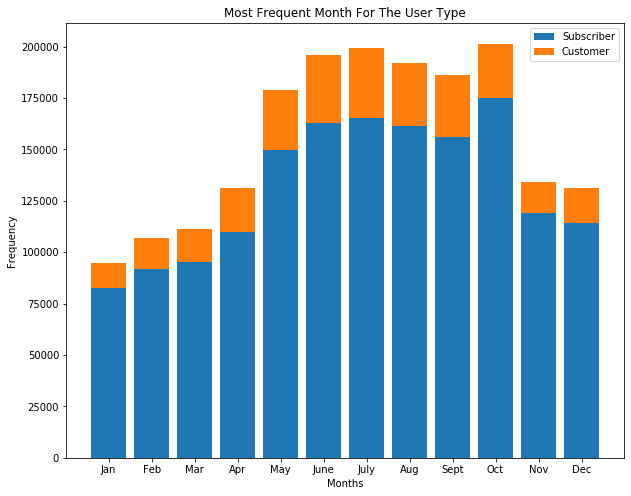

In [4]:
cat1_order = ['Jan', 'Feb', 'Mar', 'Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
cat2_order = ['Subscriber', 'Customer']
plt.figure(figsize = [10, 8])
baselines = np.zeros(len(cat1_order))

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['user_type'] == cat2]['month'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines )
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order);
plt.title("Most Frequent Month For The User Type")
plt.xlabel("Months")
plt.ylabel("Frequency");

## (Visualization 3)

> This plot describes the relationship between seasons and the trip duration in hours and I found almost all of the seasons are close to each other and most of the trips reached 24 minute but even though the seasons were close to each other but it is slightly different that Summer season has the longest trip duration

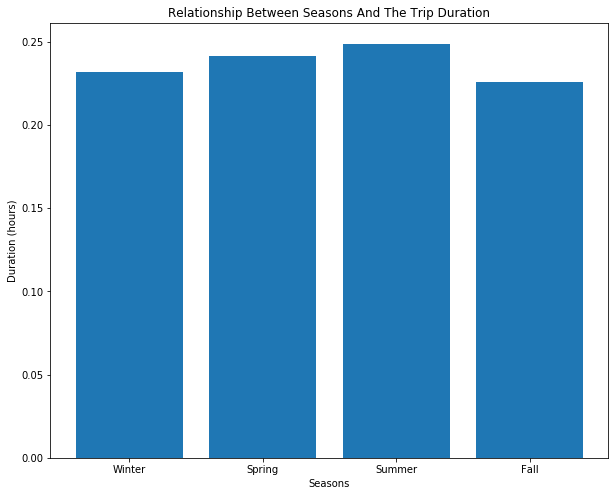

In [5]:
df['duration_hours'] = df['duration_sec'] / 3600

winter = df.query('month in ["Dec" , "Jan" , "Feb"]' ).duration_hours.mean()
spring = df.query('month in ["Mar" , "Apr" , "May"]' ).duration_hours.mean ()
summer = df.query('month in ["June" , "July" , "Aug"] ').duration_hours.mean()
fall = df.query('month in ["Sept" , "Nov" , "Dec"] ').duration_hours.mean()

plt.figure(figsize=[10,8])
plt.bar(['Winter','Spring','Summer','Fall'],[winter , spring , summer , fall] )
plt.title("Relationship Between Seasons And The Trip Duration")
plt.xlabel("Seasons")
plt.ylabel("Duration (hours)");

## (Visualization 4)

> This plot shows the longest trip duration per month for both subscribers and customer. As we can see that customers through all of the months has longer trips duration than subscriber

In [ ]:
lo = sb.FacetGrid(data =  df, hue = 'user_type', height = 10)
lo.map(sb.stripplot, 'month','duration_sec', alpha = 1/5 )
lo.add_legend();
plt.title("The Longest Trip Duration For The User Type")
plt.xlabel("Months")
plt.ylabel("Duration (seconds)");

## (Visualization 5)

> Here this plot describe the rush time per month for weekdays. I notice that Sunday and Saturday in the first months of the year the rush time was approximate about 35 minute to 40 minute after it's open. which means the weekdays varible it has an impact on the result for the months because I found that the rush time at begging of the year months and in two days unlike before with user type was in the October

In [ ]:
weekday={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

df['start_time'] = pd.to_datetime(df['start_time'])
df['weekday'] = df['start_time'].dt.dayofweek.map(weekday)
 
plt.figure(figsize=[10,8])
sb.pointplot(data=df,x='month',y='duration_hours',hue='weekday', dodge = 0.3 )
plt.title("Rush time per Month For Weekdays")
plt.xlabel("Months")
plt.ylabel("Duration (hours)");